### Natural Language Processing

Natural Language Processing (NLP) is a domain within Computer Science, specifically under the umbrella of Artificial Intelligence (AI). It equips computers with the ability to interpret, understand, and process human language—both text and speech—as naturally as humans do.

At the core of NLP lies a blend of computational linguistics—rules-based modeling of human language—with the dynamic power of statistical methods, machine learning, and deep learning models. This integration allows computers not only to process human language, whether in text or voice form but also to grasp the complete meaning, discerning the intent and sentiment of the speaker or writer.

For our exploration into the world of NLP, we will leverage the capabilities of prominent libraries including:
- **sklearn**
- **nltk**

NLP finds its application in a myriad of real-world scenarios, enhancing and streamlining our interactions and processes. Some notable applications are:
- Machine translation, bridging language barriers across the globe
- Spam detection, safeguarding our inboxes from unwanted emails
- Text summarization, distilling lengthy documents into concise summaries
- Chatbots, providing instant customer support and engagement

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import string
# from string import punctuation
# from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

# from sklearn import svm
from sklearn.utils import shuffle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmitc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**CountVectorizer** - Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [6]:
corpus = ['Apple Orange Orange Apple',\
  'Apple Banana Apple Banana',\
  'Banana Apple Banana Banana Banana Apple',\
  'Banana Orange Banana Banana Orange Banana',\
  'Banana Apple Banana Banana Orange Banana']

print("Using count vectorizer")
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(corpus)
print(pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names_out()).to_string())

Using count vectorizer
   apple  banana  orange
0      2       0       2
1      2       2       0
2      2       4       0
3      0       4       2
4      1       4       1


**TfidfVectorizer** - TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.


**Term Frequency (tf)**:
$\[ tf(t) = \text{"Number of times term } t \text{ occurs in a document"} \]$


**Inverse Document Frequency (idf)**:
$\[ idf(t) = \log_e \left( \frac{1 + n}{1 + df(t)} \right) + 1 \]$

Where:
- $\(t\)$ represents the term.
- $\(n\)$ is the total number of documents in the document set.
- $\(df(t)\)$ is the number of documents in the document set that contain the term \(t\).

- Reference: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

In [7]:
print("\nUsing tfidf")
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(corpus)
print(pd.DataFrame(tfidf.A, columns=tfidf_vec.get_feature_names_out()).to_string())


Using tfidf
      apple    banana    orange
0  0.643744  0.000000  0.765241
1  0.707107  0.707107  0.000000
2  0.447214  0.894427  0.000000
3  0.000000  0.859622  0.510931
4  0.233043  0.932173  0.277026


### Dataset:
- https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [8]:
df = pd.read_csv('Reviews.csv')

In [9]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df.shape

(568454, 10)

- We would like to get an idea of the number of records that are 3 star and lower as well as 3 star and higher.

In [11]:
pos = df[df['Score']>3]
neg = df[df['Score']<3]
print(pos.shape, neg.shape)

(443777, 10) (82037, 10)


In [12]:
pos = pos.head(neg.shape[0])
print(pos.shape, neg.shape)
df = pd.concat([pos,neg])

(82037, 10) (82037, 10)


In [13]:
df = shuffle(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
268566,268567,B004SRFYMK,A1JI6OOS9NUHW,David Bango,1,1,1,1309132800,Almost Undrinkable,After hearing good things about coconut water ...
138043,138044,B001J8LGEG,A25MNGSLAHTZ72,Margaret A. Noldon,0,1,1,1301529600,Wellness,We have a Cane Corso puppy who was 10 months o...
67715,67716,B007OXJK3Y,ACKAEYHGI7KXO,Jeff,0,0,2,1331424000,I really wanted to like this...,I really wanted to like this flavor and drank ...
315262,315263,B0000DIVVO,A1MO684LSG7O80,"Erin Wetzel ""ekwetzel""",4,4,1,1180742400,Flying Noodle isn't that Great,"The products are ok, but my experience with th..."
33042,33043,B00112K2MC,AWV6207BCLF0Q,AstJ,0,0,4,1238112000,Kids love it!,My children enjoyed drinking this. It was a s...


### Preprocessing
- Remove all neutral scores and seperate the remaning into positive = 1 and negative = 0.
- Preprocessing ususally involves:
    - Removing additional white spaces
    - Replacing emoji's with a word representation for example :) ==> smile
    - Removing links from the corpus
    - Removing punctuation
    - Removing HTML tags
    - Remove duplicate reviews
    - Here are some good links on how to process and clean text: 
        - https://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/ and https://machinelearningmastery.com/clean-text-machine-learning-python/

- **For this exercise we will only tokenize reviews, that is change "This is a review" to ['this', 'is', 'a', 'review'].**
- After the text is 'clean' we will use sklearn.

In [14]:
df = df[df['Score'] !=3]
X = df['Text']

y_map = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_map)
# y = df['Score'].apply(lambda x: 0 if x < 3 else 1) # another way to do it

In [15]:
X.head(5)

268566    After hearing good things about coconut water ...
138043    We have a Cane Corso puppy who was 10 months o...
67715     I really wanted to like this flavor and drank ...
315262    The products are ok, but my experience with th...
33042     My children enjoyed drinking this.  It was a s...
Name: Text, dtype: object

In [16]:
y.head(5)

268566    0
138043    0
67715     0
315262    0
33042     1
Name: Score, dtype: int64

### Classification

Once the text is processed the next step is to do the actual classification. For this exercise we will be using a Logistic Regression Classifier. However there are many other popular classifiers that may perform better:

- Support Vector Machine and its variants
- Naive Bayes and its variants
- Random Forests and its variants

Let's create a function that takes in the training set X , test set y, the model being used model and the classification algorithm clf_model as well as a variable that will show the top coefficients if true coef_show

In [17]:
def text_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1: 
        w = model.get_feature_names_out()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

### Classification Experiments

- Logistic regression model on word count
- Logistic regression model on TFIDF
- Logistic regression model on TFIDF + ngram

NGram Definition: N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occuring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios). 

[Explanation and Example Here](https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/)

In [18]:
countv = CountVectorizer(stop_words = 'english')
text_fit(X, y, countv, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019


c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Recall: 0.9026471018378589

-Top 20 positive-
      Word  Coefficient
pleasantly     3.321380
    resist     2.789725
  drawback     2.472206
 skeptical     2.442040
    hooked     2.348761
 addicting     2.346386
   welcome     2.258856
    intend     2.195818
  downside     2.182846
  soothing     2.086807
 delicious     2.022723
 dissolves     2.018933
   worries     2.009006
       met     1.977883
     penny     1.932991
 delighted     1.931880
     saves     1.929904
 complaint     1.889918
 excellant     1.882874
 addictive     1.881206

-Top 20 negative-
          Word  Coefficient
          pity    -2.158245
         falls    -2.163715
         blech    -2.195161
       sounded    -2.202324
   embarrassed    -2.268499
        ripoff    -2.312356
disappointment    -2.421057
       expired    -2.434303
         lousy    -2.455987
        bummer    -2.481101
         awful    -2.486610
   disapointed    -2.568524
 disappointing    -2.606119
      terrible    -2.635332
  una

In [19]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.898454638521913

-Top 20 positive-
      Word  Coefficient
     great    11.105745
 delicious     9.845600
      best     9.599335
   perfect     8.575894
     loves     8.012604
 excellent     7.908379
    highly     7.237782
      love     7.225954
   amazing     6.837884
 wonderful     6.659534
      good     6.518730
   awesome     6.404942
  favorite     6.386710
    hooked     6.380181
      nice     5.990011
pleasantly     5.882815
   pleased     5.662437
     yummy     5.646264
      glad     5.346206
 fantastic     5.327621

-Top 20 negative-
          Word  Coefficient
      thinking    -5.450466
         stale    -5.548370
     tasteless    -5.761808
         waste    -5.967136
        hoping    -5.969769
        return    -6.096990
         sorry    -6.111678
    disgusting    -6.127839
       thought    -6.170781
         threw    -6.216217
         bland    -6.289699
          weak    -6.54500

In [20]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 1932701
# train records: 123055
# test records: 41019
Model Recall: 0.9105445327353385

-Top 20 positive-
            Word  Coefficient
           great    17.928222
            best    14.055933
       delicious    13.825083
         perfect    12.328478
            love    11.540906
           loves    11.319320
       excellent    10.641918
            good     9.606531
       wonderful     9.327054
        favorite     9.124398
            nice     8.743180
         amazing     8.510473
         awesome     7.894212
            easy     7.428099
         pleased     7.420374
           happy     7.163469
           tasty     7.145230
           yummy     7.112793
          highly     7.078345
highly recommend     6.712312

-Top 20 negative-
          Word  Coefficient
         sorry    -6.696125
    disgusting    -6.702590
         waste    -6.746215
         threw    -6.999885
         money    -7.222307
        hoping    -7.241366
           bad    -7.270280
         

- There are quite a few features in our bag of words, more than 1 million!

- We will cut it down a bit to help our runtime in the following steps using sklearn's SelectPercentile function.

- SelectPercentile selects the top features of a dataset which allows us to discard features which are not as important.

- Note with SelectPercentile there is a default score function: f_classif. You can however specify others such as chi2 and f_regression.

In [21]:
def text_fit_v2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(score_func=f_classif, percentile=select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [22]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_fit_v2(X, y, tfidf_n, LogisticRegression(), 50, 1)

# features before applying select percentile: 1932701
# features after applying select percentile: 966350
# train records: 123055
# test records: 41019
Model Recall: 0.912933261833959

-Top 20 positive-
               Word  Coefficient
       network good    17.208089
         gravy just    13.650831
    appetizer mixed    13.446587
       pack holiday    11.959184
better butterscotch    11.022116
      ravioli bland    10.994682
           enforced    10.331772
         nails hair     9.185364
   focus scratching     9.017221
   time concentrate     8.880635
            usb pre     8.461112
    problems chucks     8.301065
         syrup like     7.686351
    steeping teabag     7.221716
         rely local     7.159906
       yes hazelnut     7.014751
      brown packets     6.898677
  personally novice     6.862335
       eat prepared     6.846264
    mushy postasium     6.594764

-Top 20 negative-
              Word  Coefficient
        did crispy    -6.525886
   suggests better   

- Let us present a scenario that depicts the issue with using accuracy for a **skewed** dataset. In **our case, our dataset is balanced selecting accuracy as our metric is fine**.
- We have trained a machine learning model using a variety of features (age, ethnicity, bmi, body fat percentage, ) to predict whether a person has diabetes.
- We are presented with 100 persons perform predictions on.
- The confusion matrix depicted below showcases a summary of prediction results:
    - True Positives (TP): These are cases in which we predicted yes (they have diabetes), and they do have the diabetes.
    - True Negatives (TN): We predicted no, and they don't have diabetes.
    - False Positives (FP): We predicted yes, but they don't actually have diabetes. (Also known as a "Type I error.")
    - False Negatives (FN): We predicted no, but they actually do have diabetes. (Also known as a "Type II error.")

Confusion Matrix:
![Confusion Matrix](https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

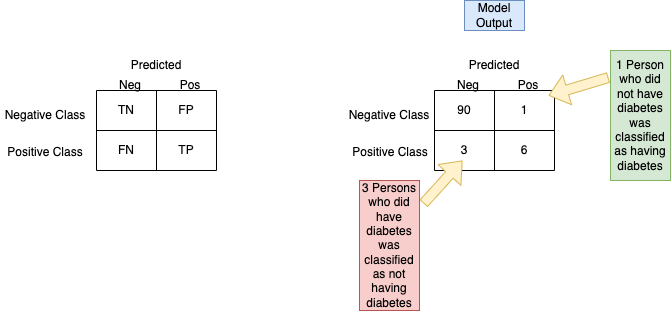

- **Accuracy**: We have over 96% accuracy! This is simply because less than 5% of our data is actually diabetic persons.
- **Precision:** When it predicts yes, how often is it correct? TP/predicted yes = 6/7 = 0.857
- **Recall**: When it's actually yes, how often does it predict yes? TP/actual yes = 6/9 = 0.666
- **F1-Score**: The harmonic mean of precision and recall - 2 * ((precision * recall) / (precision + recall)) = 0.75
- The higher the F1 score the better, with 0 being the worst possible and 1 being the best.
- In this case we might be more concerned with Recall as opposed to Precision.
- We may also want to increase the penalty for FN since they are more detrimental than a FP.
- https://link.springer.com/chapter/10.1007/978-3-030-36178-5_4
- Some material referenced from: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

### Topic Modelling

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

Non Negative Matrix Factorization (NMF), Latent Dirichlet Allocation (LDA) and Single Value Decomposition (SVD) algorithms will be used to find topics in a document collection. The output of the derived topics involved assigning a numeric label to the topic and printing out the top words in a topic.

The algorithms are not able to automatically determine the number of topics and this value must be set when running the algorithm. Comprehensive documentation on available parameters is available for both [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

- https://medium.com/analytics-vidhya/topic-modeling-with-non-negative-matrix-factorization-nmf-3caf3a6bb6da
- https://www.analyticsvidhya.com/blog/2021/06/part-18-step-by-step-guide-to-master-nlp-topic-modelling-using-lda-probabilistic-approach/
- https://towardsdatascience.com/latent-semantic-analysis-distributional-semantics-in-nlp-ea84bf686b50

In [23]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [24]:
documents = list(X)[0:10000]
print(len(documents))

10000


In [25]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [26]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [27]:
no_topics = 5

In [28]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [29]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0:
like taste product good flavor just great chocolate really love


I think that its wonderful that this is 100% dairy free, but I would rather just stick with dark chocolate then this bar.  It is rather smooth which is nice, but it has such a fake flavor of chocolate that is not pleasant to my taste buds. I am a big fan of dark chocolate for the fact that it is not overly sweet, but this chocolate bar is so sweet it almost just tastes like sugar and no chocolate flavor at all. Some people really love this stuff, so the only way you will know for sure is to try it yourself and you be the judge.  Before purchasing off of amazon, I would go to your local health food store and buy one to try.  You will save money and you will know for sure if you like this chocolate or not.


To me, it' tastes more like chocolate milk. I really like the product and I think there are better flavors out there.


my kids like all of the flavors but chocolate.  They say they just don't ta

In [30]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [31]:
print("\n\nLDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)



LDA Topics 


Topic 0:
dog tea dogs treats treat food bag time jerky loves


I have a medium size dog - 38 pounds.  He enjoys to chew on things but I have never thought of him as a heavy chewer.  The night I received this he was so excited about it.  It was so tempting to see, hear and smell the treats.  Well, within 20 minutes the toy was in the garbage.  He chewed off the rubber toy that blocks the treats from coming out.  He then started to chew where the smell of the treats is able to escape.  The plastic fell apart so easily!  He then started to break off little pieces.  I woudl not recommend this for a medium or large sized dog!


The Rover Rescue ball is perfect for all sizes of dogs.  I have 2 3 lb. yorkies and they love this toy.  The little rover inside has a great squeeker.  You put it inside the moon ball and the dogs go crazy to try and get the rover out of the ball.  This toy will keep them entertained for hours.  Also there is no material to rip get torn...the entire t

In [32]:
#SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [33]:
print("\n\nLSI Topics \n\n")
display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)



LSI Topics 


Topic 0:
br like food product just good coffee taste dog water


I must admit, I haven't gotten many gift baskets in my time. If this one is any indication of what a gift basket is like, Iam not missing anything!!!!<br /><br />To start with, the gift basket is wrapped in cellophane, with a wide dark brown ribbon, with a sticker that says Back Mountain Gift Baskets.  The basket looks like a generic, cheap looking Easter basket, with two handles, one on each side of the basket.  Iam not sure what they are made of.  Inside where the items are, they are nestled in what looks like straw.<br /><br />Now, on to the items inside.<br /><br />1.  A wrapped box that says Kenzi All Natural Dark Napolitans.  Inside that is a box of Raisinettes.  Inside of that is 6 individual, small, solid dark chocolate, thin, red  wrapped bars, which had a gray tinge to them.<br /><br />2.  Next was a wrapped Chocolate Chip Crispie Marshmallow Bar it said on the package.  Inside was a box of Goya 

### WordCloud

In [35]:
 ! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.4 kB 544.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 656.4 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 876.1 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 735.2 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 735.2 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 642.7 kB/s eta 0:00:00


In [36]:
def print_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all reviews.".format(len(text)))
    stopwords_set = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
    return wordcloud

There are 74300872 words in the combination of all reviews.


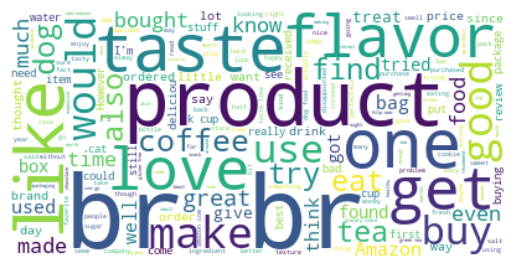

In [37]:
wordcloud = print_cloud(df['Text'])
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word1.png", dpi=300)